In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [110]:
df = pd.read_csv('/Users/melvinleo/Downloads/DSA3101_Q3/Data/digital_marketing_campaign_dataset.csv')
df.head()

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [94]:
print("========== Missing Values ==========")
print(df.isnull().sum())

print("========== Duplicate Values ==========")
print(df.duplicated().sum())

========== Missing Values ==========
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64
========== Duplicate Values ==========
0


In [95]:
print(df['CampaignChannel'].unique())
print(df['CampaignType'].unique())


['Social Media' 'Email' 'PPC' 'Referral' 'SEO']
['Awareness' 'Retention' 'Conversion' 'Consideration']


Data Cleaning

Our personalised marketing efforts in this case involves 
1. email and PPC for targeted ads
2. Social Media for brand awareness and customer engagement
3. Referral for acquiring customers through existing clients
4. SEO to improve search visibility and credibility

During our marketing campaign, we ran different campaign types to promote our product and services:
Awareness: When banks aim to introduce their services to potential customers, creating brand visibility.
Consideration: When potential customers start evaluating banking options, researching products and benefits.
Conversion: When customers are ready to act, applying for a product or opening an account.
Retention: When banks focus on keeping existing customers engaged and satisfied, fostering loyalty.

In [111]:
# dropping information redundant to our campaign which will help us calculate ROI
df.drop(
    columns=[
        'AdvertisingTool',
        'AdvertisingPlatform',
        'PagesPerVisit',
        'EmailOpens',
        'WebsiteVisits',
        'TimeOnSite',
        'SocialShares',
        'ClickThroughRate'],
    inplace=True
)

In [36]:
df.dtypes

CustomerID             int64
Age                    int64
Gender                object
Income                 int64
CampaignChannel       object
CampaignType          object
AdSpend              float64
ClickThroughRate     float64
ConversionRate       float64
EmailClicks            int64
PreviousPurchases      int64
LoyaltyPoints          int64
Conversion             int64
dtype: object

In this case we decided to keep the relevant stages of conversion and retention, which are relevant for measuring and maximizing ROI of our marketing efforts

Conversion: This stage directly impacts ROI because it focuses on customer actions, such as applying for a product or opening an account. It is the most immediate driver of revenue and is essential for calculating the effectiveness of marketing spend in acquiring new customers.

Retention: Retaining customers can improve lifetime value, which is a crucial factor for maximizing ROI. Engaged and loyal customers are more likely to make additional purchases, use more services, or even refer new customers, thereby enhancing long-term revenue.

In [112]:
df_marketing = df[df['CampaignType'].isin(['Conversion', 'Retention'])]
df_marketing

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ConversionRate,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
1,8001,69,Male,41760,Email,Retention,3898.668606,0.182725,7,2,3459,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.088004,2,0,2463,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.109940,6,8,4345,1
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.188946,3,0,2983,1
8,8008,36,Female,140788,Email,Retention,9421.250951,0.112585,8,5,460,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7989,15989,50,Female,84079,PPC,Retention,277.975579,0.183031,0,0,2935,0
7991,15991,62,Female,69289,SEO,Retention,6118.863881,0.047079,5,3,3075,1
7992,15992,37,Male,138422,Referral,Retention,2024.148848,0.068403,0,5,2733,0
7993,15993,20,Male,120271,Social Media,Retention,6973.120174,0.174582,1,7,3066,0


In [98]:
df_marketing.describe()

,CustomerID,Age,Income,AdSpend,ConversionRate,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,11984.893390,44.011680,84568.041750,4987.186666,0.104061,4.484841,4.530815,2480.162525,0.897117
std,2293.596494,14.822644,37395.411917,2846.222990,0.054973,2.856980,2.890158,1423.547374,0.303843
min,8001.000000,18.000000,20057.000000,103.956957,0.010020,0.000000,0.000000,1.000000,0.000000
25%,9985.750000,32.000000,51917.000000,2472.063139,0.056163,2.000000,2.000000,1257.500000,1.000000
50%,12000.000000,44.000000,84526.500000,5039.892169,0.103603,4.000000,5.000000,2471.500000,1.000000
75%,13934.000000,57.000000,116432.750000,7432.776248,0.150915,7.000000,7.000000,3676.000000,1.000000
max,15996.000000,69.000000,149986.000000,9997.914781,0.199995,9.000000,9.000000,4999.000000,1.000000


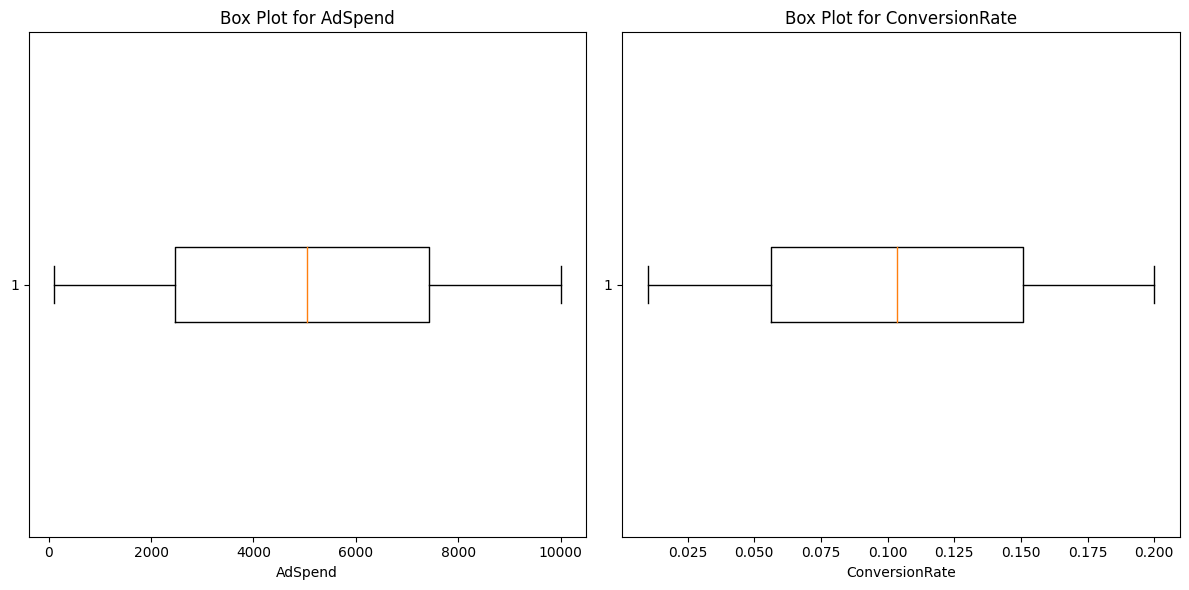

In [99]:
# Checking for outliers in the case of income, adspend and timeonesite
columns = ['AdSpend', 'ConversionRate']

# Set up the plot
plt.figure(figsize=(12, 6))

# Generate a box plot for each column
for i, column in enumerate(columns, 1):
    plt.subplot(1, len(columns), i)
    plt.boxplot(df_marketing[column].dropna(), vert=False)
    plt.title(f'Box Plot for {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()


The box plots reveal that AdSpend, Income, and TimeOnSite have well-distributed values with no outliers. This will help to ensure that the analysis of ROI for personalized marketing efforts reflects typical customer behavior and avoids misleading extremes. This help ensure that our model will have more reliable predictions later on, without the need for outlier handling.

Feature Engineering step

Proceed to perform feature engineering to calculate
1. ROI
Our average revenue per conversion is taken from overall value earned from our banking clients particularly in areas like private banking, mortgages, corporate banking, and investment accounts, amoutning to 60,000.

Our ROI here is calculated: Total Revenue - Total Ad Spend / Total Ad Spend
Where totla revenue is the conversion rate of each customer * 60,000 (average revenue per conversion)

2. Customer Lifetime value
Total revenue a business can expect from a customer, adjusted by factors like loyalty points and conversion metrics.

CLV focuses on average revenue per conversion, multiplied by expected purchase frequency within a chosen period (e.g., a year). 

3. Conversion Rates
Recorded in the dataset

4. Campaign costs
Represented by Ad spend

In [114]:
avg_revenue_per_conversion = 60000

# Calculate estimated revenue from conversion rate and average revenue per conversion
df_marketing['Revenue'] = df_marketing['ConversionRate'] * avg_revenue_per_conversion
df_marketing['ROI'] = (df_marketing['Revenue'] - df_marketing['AdSpend']) / df_marketing['AdSpend'] 

# Calculate CLV, assuming a standard period of 1 year
df_marketing['CLV'] = (avg_revenue_per_conversion + df_marketing['LoyaltyPoints']) * df_marketing['PreviousPurchases']

df_marketing

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ConversionRate,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Revenue,ROI,CLV
1,8001,69,Male,41760,Email,Retention,3898.668606,0.182725,7,2,3459,1,10963.48098,1.812109,126918
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.088004,2,0,2463,1,5280.25122,8.786835,0
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.109940,6,8,4345,1,6596.40618,2.931010,514760
7,8007,56,Female,57083,Social Media,Conversion,5324.283667,0.188946,3,0,2983,1,11336.75550,1.129255,0
8,8008,36,Female,140788,Email,Retention,9421.250951,0.112585,8,5,460,1,6755.10066,-0.282993,302300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,15989,50,Female,84079,PPC,Retention,277.975579,0.183031,0,0,2935,0,10981.84434,38.506508,0
7991,15991,62,Female,69289,SEO,Retention,6118.863881,0.047079,5,3,3075,1,2824.75710,-0.538353,189225
7992,15992,37,Male,138422,Referral,Retention,2024.148848,0.068403,0,5,2733,0,4104.17598,1.027606,313665
7993,15993,20,Male,120271,Social Media,Retention,6973.120174,0.174582,1,7,3066,0,10474.92798,0.502187,441462


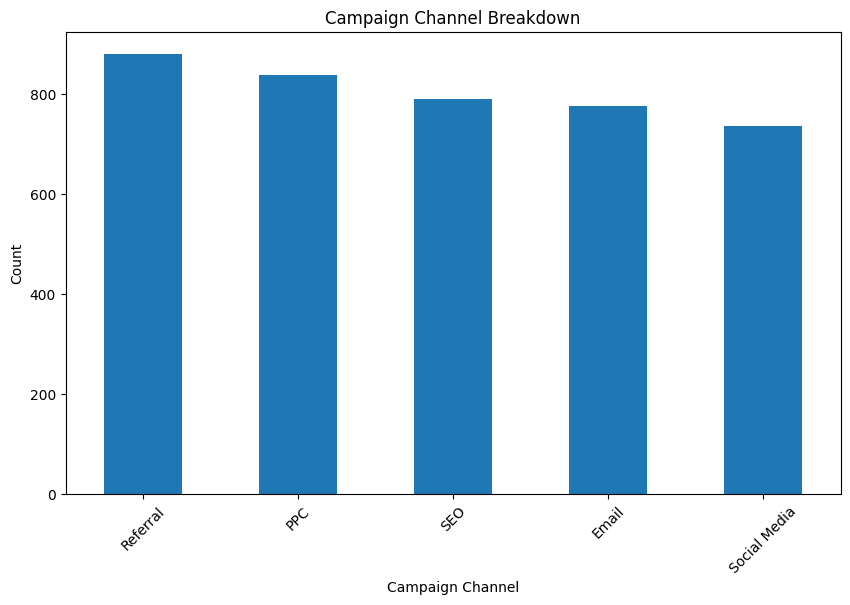

In [121]:
# Assuming df_marketing is defined and has a 'CampaignChannel' column
campaign_counts = df_marketing['CampaignChannel'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
campaign_counts.plot(kind='bar')
plt.title("Campaign Channel Breakdown")
plt.xlabel("Campaign Channel")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


Label encoding for non-numerical columns

In [115]:
# Initialize label encoders
gender_encoder = LabelEncoder()
campaign_type_encoder = LabelEncoder()


# Dropping the CustomerID
df_marketing = df_marketing.drop(columns=['CustomerID'])


# Apply label encoding 
df_marketing.loc[:,'Gender'] = gender_encoder.fit_transform(df_marketing['Gender'])
df_marketing.loc[:,'CampaignType'] = campaign_type_encoder.fit_transform(df_marketing['CampaignType'])


df_marketing

,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ConversionRate,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Revenue,ROI,CLV
1,69,1,41760,Email,1,3898.668606,0.182725,7,2,3459,1,10963.48098,1.812109,126918
3,32,0,44085,PPC,0,539.525936,0.088004,2,0,2463,1,5280.25122,8.786835,0
4,60,0,83964,PPC,0,1678.043573,0.109940,6,8,4345,1,6596.40618,2.931010,514760
7,56,0,57083,Social Media,0,5324.283667,0.188946,3,0,2983,1,11336.75550,1.129255,0
8,36,0,140788,Email,1,9421.250951,0.112585,8,5,460,1,6755.10066,-0.282993,302300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7989,50,0,84079,PPC,1,277.975579,0.183031,0,0,2935,0,10981.84434,38.506508,0
7991,62,0,69289,SEO,1,6118.863881,0.047079,5,3,3075,1,2824.75710,-0.538353,189225
7992,37,1,138422,Referral,1,2024.148848,0.068403,0,5,2733,0,4104.17598,1.027606,313665
7993,20,1,120271,Social Media,1,6973.120174,0.174582,1,7,3066,0,10474.92798,0.502187,441462


Feature selection using random forest regressor

Reduce dimensions, overfitting rsik and also avoid more multicollinearity issues across the different features

In [116]:
X = df_marketing.drop(columns=['ROI', 'CampaignChannel'])  # features
y = df_marketing['ROI'] # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances_sorted = feature_importances.sort_values(ascending=False) 

feature_importances_sorted

AdSpend              0.741370
Revenue              0.127251
ConversionRate       0.110853
Income               0.008524
LoyaltyPoints        0.002710
Age                  0.002494
CLV                  0.002044
PreviousPurchases    0.001964
EmailClicks          0.001259
Conversion           0.000769
Gender               0.000462
CampaignType         0.000300
dtype: float64

Campaign cost in this case is the greatest contributor to how effective our campaign is, followed by the revenue and conversionr rate.

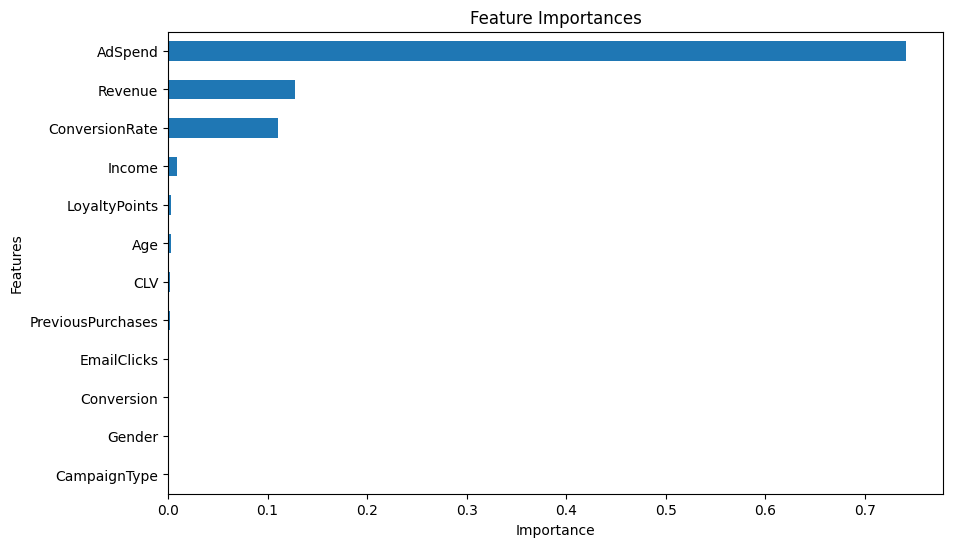

In [125]:
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=True).plot(kind='barh')
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

Post Feature selection, we will begin training the model for each of our 5 marketing strategies to predict the ROI and performance.

Training a few model according to the cleaned data and using a threshold of 0.8 for model training

## Linear Regression

Starting off with simpler models

In [118]:
from sklearn.linear_model import LinearRegression


# Get the top 7 features so that we have CLV Inclusive 
top_features = feature_importances.nlargest(7).index 

marketing_strategies = df_marketing['CampaignChannel'].unique().tolist()


# Conducting an analysis for each of the 
for strategy in marketing_strategies:

    print(f"========== {strategy} ==========")

    X_strategy = df_marketing[df_marketing['CampaignChannel'] == strategy]
    Y_strategy = X_strategy['ROI']
    X_strategy = X_strategy.drop(columns=['ROI', 'CampaignChannel'])
    X_strategy = X_strategy[top_features]

    X_train, X_test, y_train, y_test = train_test_split(X_strategy, Y_strategy, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R2 Score: {r2}")
    print(f'ROI Mean: {Y_strategy.mean()}')
    print()


========== Email ==========
Mean Absolute Error (MAE): 1.9251074787062403
Root Mean Squared Error (RMSE): 3.7462961245296675
R2 Score: 0.3434977186033116
ROI Mean: 1.4581831090204065

========== PPC ==========
Mean Absolute Error (MAE): 2.2389700370702688
Root Mean Squared Error (RMSE): 3.044893197613122
R2 Score: 0.32562338597022145
ROI Mean: 1.8895801537151282

========== Social Media ==========
Mean Absolute Error (MAE): 2.843349904873618
Root Mean Squared Error (RMSE): 4.909859329905014
R2 Score: 0.27380509728666824
ROI Mean: 2.1971547087470658

========== Referral ==========
Mean Absolute Error (MAE): 2.532526841051633
Root Mean Squared Error (RMSE): 5.603152694203045
R2 Score: 0.283653070112294
ROI Mean: 1.8996245008144463

========== SEO ==========
Mean Absolute Error (MAE): 2.5891701625823664
Root Mean Squared Error (RMSE): 4.682717672043168
R2 Score: 0.36805139997725345
ROI Mean: 1.9732796784077806



## Randomforest Regressor

In [104]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search CV to get the best given parameters that will return the best results
def rf_best_params(X_train, y_train):
    param_dist = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist, n_iter=20, cv=5, scoring='neg_mean_squared_error', random_state=42)
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    return best_params


In [105]:
marketing_strategies = df_marketing['CampaignChannel'].unique().tolist()


# Conducting an analysis for each of the 
for strategy in marketing_strategies:

    print(f"========== {strategy} ==========")

    X_strategy = df_marketing[df_marketing['CampaignChannel'] == strategy]
    Y_strategy = X_strategy['ROI']
    X_strategy = X_strategy.drop(columns=['ROI', 'CampaignChannel'])
    X_strategy = X_strategy[top_features]

    X_train, X_test, y_train, y_test = train_test_split(X_strategy, Y_strategy, test_size=0.2, random_state=42)

    # Training and getting the best parameters
    best_params = rf_best_params(X_train, y_train)

    model = RandomForestRegressor(**best_params, random_state=42)
    model.fit(X_train, y_train)  


    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R2 Score: {r2}")
    print(f'ROI Mean: {Y_strategy.mean()}')
    print()


========== Email ==========
Mean Absolute Error (MAE): 0.3013080054384531
Root Mean Squared Error (RMSE): 1.2102846745493039
R2 Score: 0.9013335293286024
ROI Mean: 1.0484859241836717

========== PPC ==========
Mean Absolute Error (MAE): 0.11365697508068545
Root Mean Squared Error (RMSE): 0.3181934863440812
R2 Score: 0.9893951767203207
ROI Mean: 1.4079834614292734

========== Social Media ==========
Mean Absolute Error (MAE): 0.4291382626558667
Root Mean Squared Error (RMSE): 1.7687237014169834
R2 Score: 0.8642944591337436
ROI Mean: 1.664295590622555

========== Referral ==========
Mean Absolute Error (MAE): 0.5377151803001505
Root Mean Squared Error (RMSE): 2.421579188775698
R2 Score: 0.8073281215031829
ROI Mean: 1.4163537506787052

========== SEO ==========
Mean Absolute Error (MAE): 0.6537284008943688
Root Mean Squared Error (RMSE): 2.717971146495206
R2 Score: 0.693424119964243
ROI Mean: 1.4777330653398173



## Gradeint Boosting Regressor

In [117]:
from sklearn.ensemble import GradientBoostingRegressor

marketing_strategies = df_marketing['CampaignChannel'].unique().tolist()


# Conducting an analysis for each of the 
for strategy in marketing_strategies:

    print(f"========== {strategy} ==========")

    X_strategy = df_marketing[df_marketing['CampaignChannel'] == strategy]
    Y_strategy = X_strategy['ROI']
    X_strategy = X_strategy.drop(columns=['ROI', 'CampaignChannel'])
    X_strategy = X_strategy[top_features]

    X_train, X_test, y_train, y_test = train_test_split(X_strategy, Y_strategy, test_size=0.2, random_state=42)

    model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.2, max_depth=3, random_state=42)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R2 Score: {r2}")
    print(f'ROI Mean: {Y_strategy.mean()}')
    print()


========== Email ==========
Mean Absolute Error (MAE): 0.31690127668067064
Root Mean Squared Error (RMSE): 1.410101600076519
R2 Score: 0.9069893146788569
ROI Mean: 1.4581831090204065

========== PPC ==========
Mean Absolute Error (MAE): 0.1605482820242968
Root Mean Squared Error (RMSE): 0.36383644719201985
R2 Score: 0.9903712307760786
ROI Mean: 1.8895801537151282

========== Social Media ==========
Mean Absolute Error (MAE): 0.5227390059125986
Root Mean Squared Error (RMSE): 1.9007669782385417
R2 Score: 0.8911639293246233
ROI Mean: 2.1971547087470658

========== Referral ==========
Mean Absolute Error (MAE): 0.42526661962629464
Root Mean Squared Error (RMSE): 1.8081919919246385
R2 Score: 0.9253984980188866
ROI Mean: 1.8996245008144463

========== SEO ==========
Mean Absolute Error (MAE): 0.5461746726509134
Root Mean Squared Error (RMSE): 1.9721630577181959
R2 Score: 0.8879088186655008
ROI Mean: 1.9732796784077806



By comparing different model,  gradient boosting regressor seems the most effective and we will use it as our main model for predicting the ROI